<a href="https://colab.research.google.com/github/vikassaini075/INSE-6220/blob/main/INSE6220Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Pycaret**
 

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (15,12)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The dataset contains images of Kecimen and Besni raisin varities grown in Turkey. It contains 900 data points of raisin grans. It includes 450 pieces from both varities. From there images 8 features were extracted.

Attribute Information:

1.) Area: Gives the number of pixels within the boundaries of the raisin. 

2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.

3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.

4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.

5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 

6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.

7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.

8.) Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vikassaini075/INSE-6220/main/Raisin_Grains_Dataset-Table%201.csv')
df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter    Class  
0   0.758651   1184.040  Kecimen  
1   0.684130   1121.786  Kecimen  
2   0.637613   1208.575  Kecimen  
3   0.699599    844.162  Kecimen  
4   0.792772   1073.251  Kecimen  
5   0.658456    881.836  Kecimen  
6   0.665894    823.796  Kecimen  
7   0.743598    933.366  Kecimen  
8   0.698031    849.728  Kecimen  
9   0.664376    981.544  Kecimen  
10  0.674236   1176.305  Kecimen  
11  0.697068    818.873  Kecimen  
12  0.690856    803.748  Kecimen  
13  0.772322   1042.770  Kecimen  
14  0.680182   1084.729  Kecimen  
15  0.681551    751.413  Kecimen  
16  0.756773   1028.445  Kecimen  
17  0.694998    981.509  Kecimen  
18  0.713838    814.680  Kecimen  
19  0.728075   1061.321  Kecimen  
20  0.734399   1035.501  Kecimen  
21  0.723609    928.272  Kecimen  
22  0.686375   1106.355  Kecimen  
23  0.643596    971.769  Kecimen  
24  0.704057   1181.921  Kecimen

In [7]:
#Preprocessing the data by Replacing Kecimen with 0 and Besni with 1 

df["Class"]=df["Class"].replace("Kecimen",0)
df["Class"]=df["Class"].replace("Besni",1)

In [8]:
df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter  Class  
0   0.758651   1184.040      0  
1   0.684130   1121.786      0  
2   0.637613   1208.575      0  
3   0.699599    844.162      0  
4   0.792772   1073.251      0  
5   0.658456    881.836      0  
6   0.665894    823.796      0  
7   0.743598    933.366      0  
8   0.698031    849.728      0  
9   0.664376    981.544      0  
10  0.674236   1176.305      0  
11  0.697068    818.873      0  
12  0.690856    803.748      0  
13  0.772322   1042.770      0  
14  0.680182   1084.729      0  
15  0.681551    751.413      0  
16  0.756773   1028.445      0  
17  0.694998    981.509      0  
18  0.713838    814.680      0  
19  0.728075   1061.321      0  
20  0.734399   1035.501      0  
21  0.723609    928.272      0  
22  0.686375   1106.355      0  
23  0.643596    971.769      0  
24  0.704057   1181.921      0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [9]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [10]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis** 

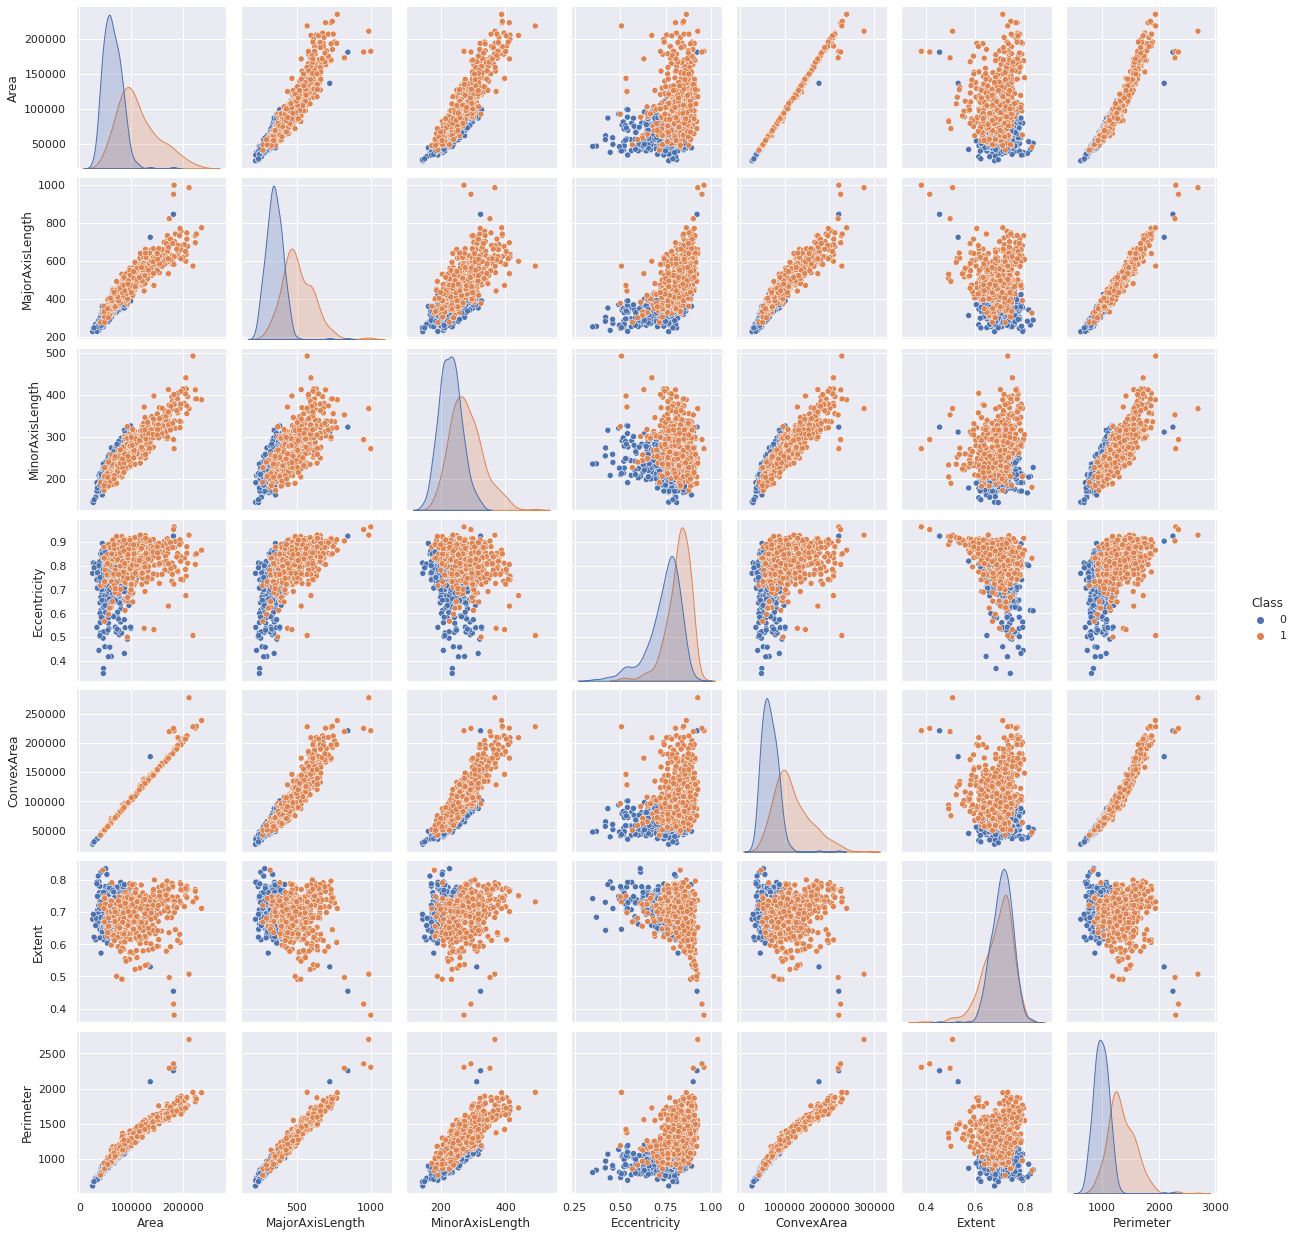

In [36]:
sns.pairplot(df, hue='Class',)
plt.show()

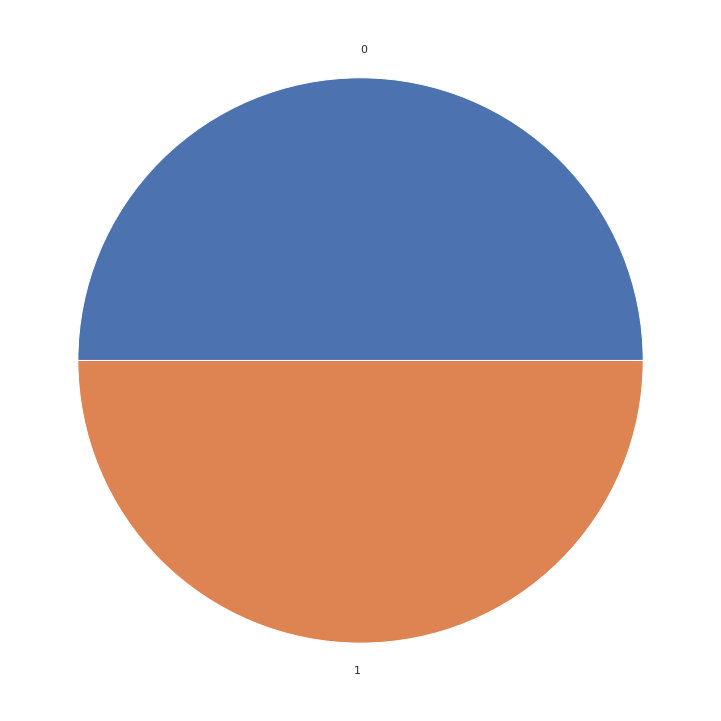

In [11]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

### **Data Matrix**

In [12]:
X = df.drop(columns=['Class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   
5  49242       318.125407       200.122120      0.777351       51368   
6  42492       310.146072       176.131449      0.823099       43904   
7  60952       332.455472       235.429835      0.706058       62329   
8  42256       323.189607       172.575926      0.845499       44743   
9  64380       366.964842       227.771615      0.784056       66125   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
5  0.658456    881.836  
6  0.665894    823.796  
7  0.743598    933.366  
8  0.698031    849.728  
9  0.664376    981.544

In [13]:
X.describe().transpose()

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

Standardize the Data

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007186         0.097577        -0.023958      0.423142   -0.015709   
1 -0.324217        -0.209012        -0.229292      0.224476   -0.304248   
2  0.078292         0.097758         0.236988      0.186239    0.062113   
3 -1.074286        -1.245051        -0.915273     -1.069623   -1.076165   
4 -0.215393        -0.678958         0.727354     -2.409827   -0.238623   
5 -0.989269        -0.972699        -1.088166     -0.046427   -0.977212   
6 -1.162433        -1.041504        -1.568353      0.460367   -1.160393   
7 -0.688862        -0.849133        -0.381463     -0.836226   -0.708208   
8 -1.168487        -0.929031        -1.639519      0.708518   -1.139802   
9 -0.600920        -0.551563        -0.534746      0.027845   -0.615047   

     Extent  Perimeter  
0  1.106743   0.066274  
1 -0.287777  -0.161252  
2 -1.158250   0.155945  
3  0.001711  -1.175915  
4  1.745259  -0.338639  
5 -0.768202  -1.038224  
6 -0.629029  -1.250349  
7  0.825066  -0.849891  
8 -0.027639  -1.155572  
9 -0.657433  -0.673810

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**


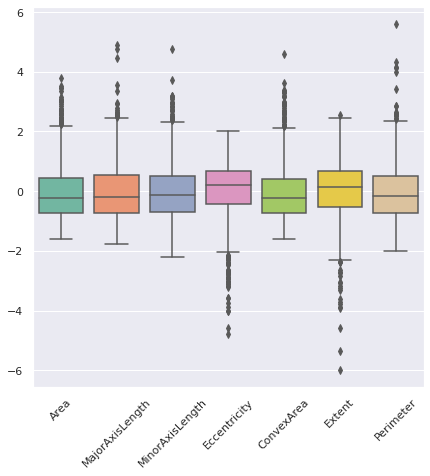

In [19]:
ax = plt.figure(figsize=(7,7))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

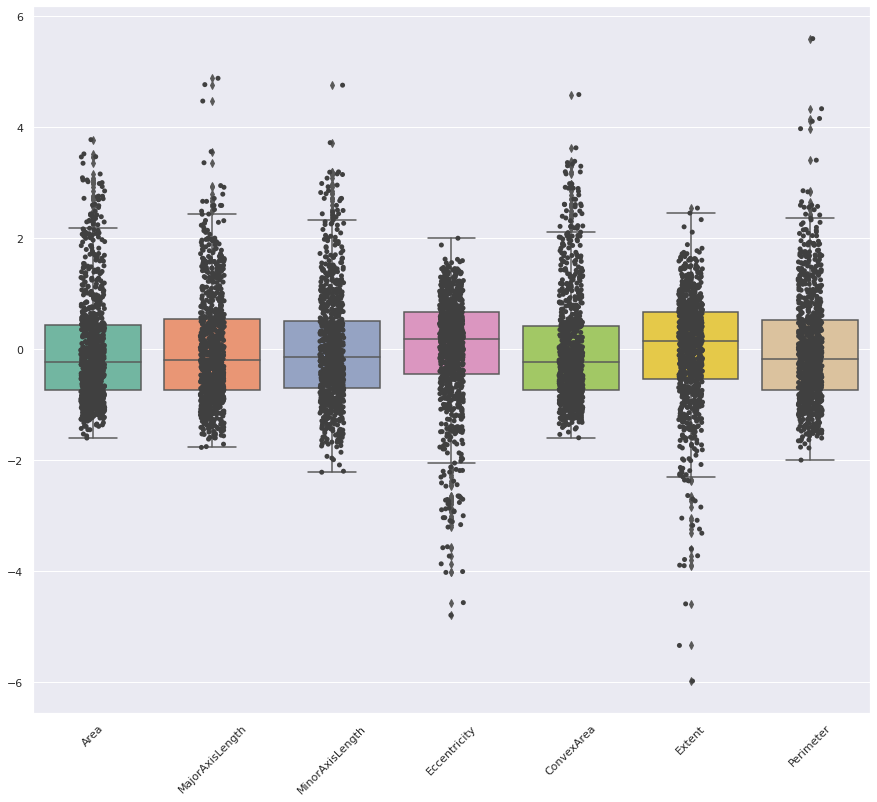

In [19]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

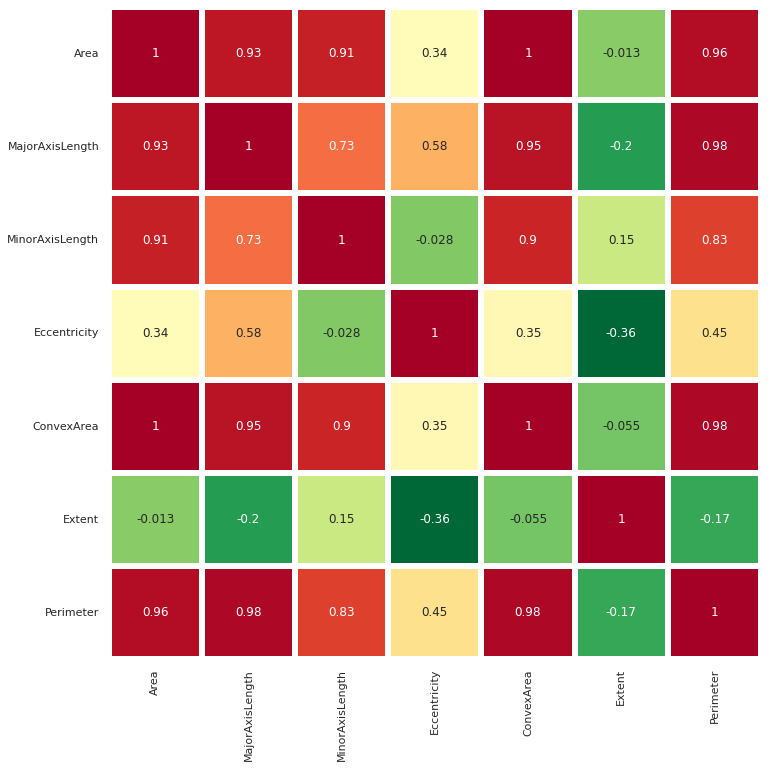

In [33]:
from IPython.core.pylabtools import figsize
from matplotlib import figure
ax = sns.heatmap(X.corr(), cmap="RdYlGn_r", linewidths=5, annot=True, cbar=False, square=True, )

plt.yticks(rotation=0,)
ax.tick_params(labelbottom=True,labeltop=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

**Principal Component Analysis (PCA)**

Text(0, 0.5, 'Value: 1')

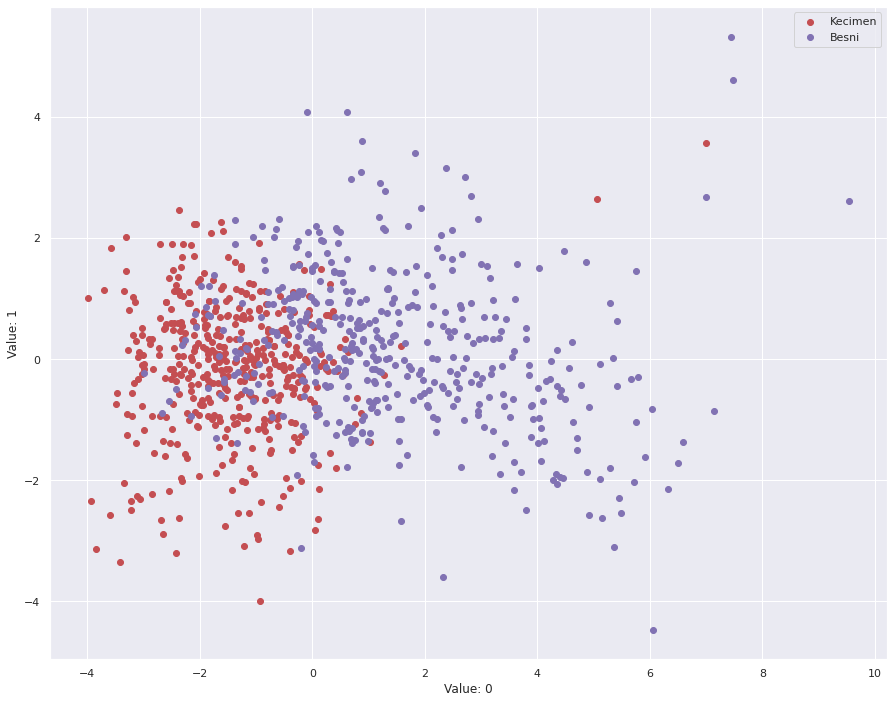

In [39]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Kecimen)->0,  2(Besni)->1
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)
 

plt. figure()
plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='m', label='Besni')
 
plt.legend()
plt.xlabel('Value: 0')
plt.ylabel('Value: 1')

**Eigen Vectors**


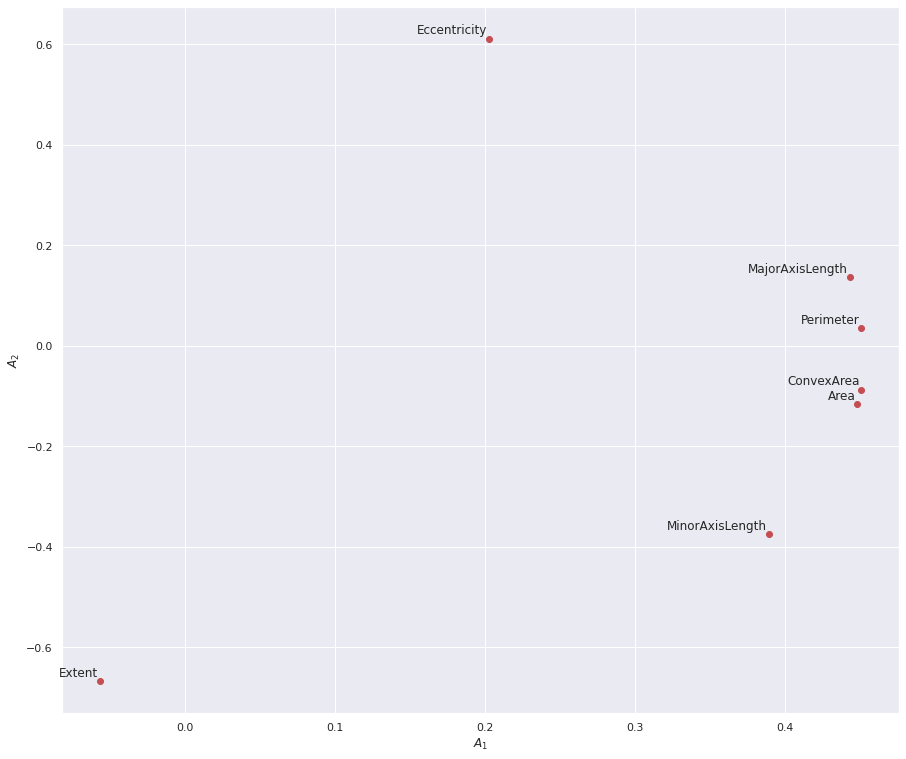

In [22]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


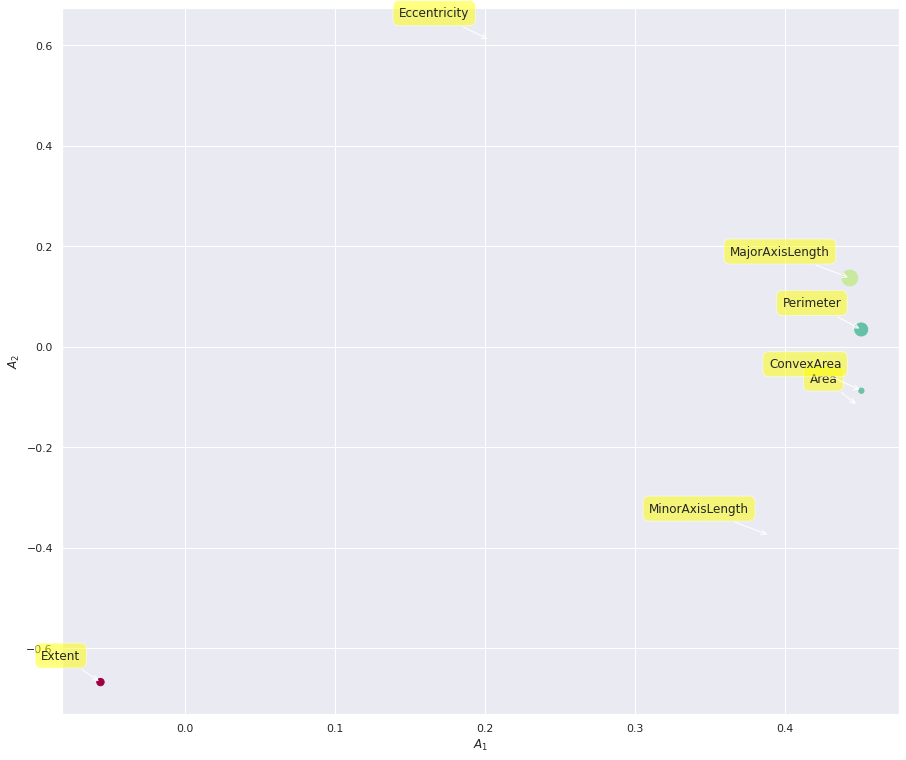

In [23]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

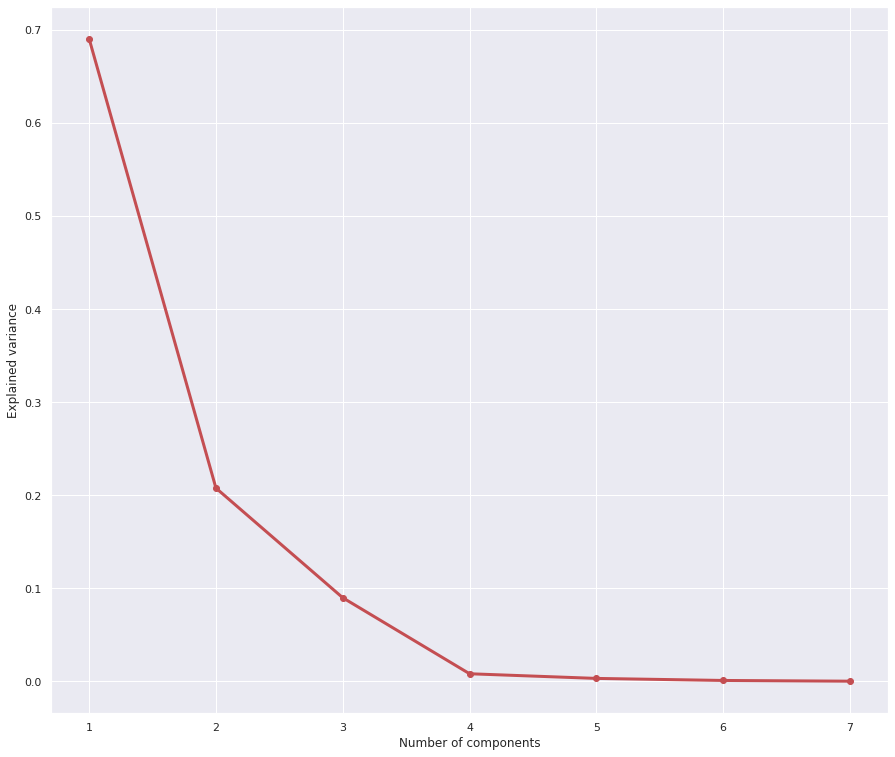

In [24]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

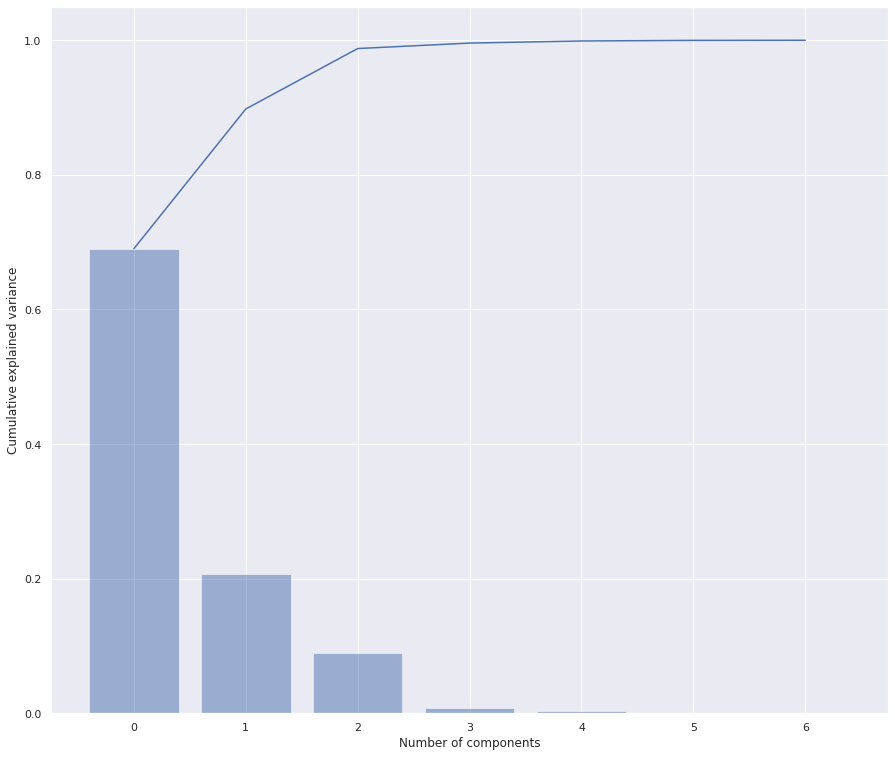

In [25]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

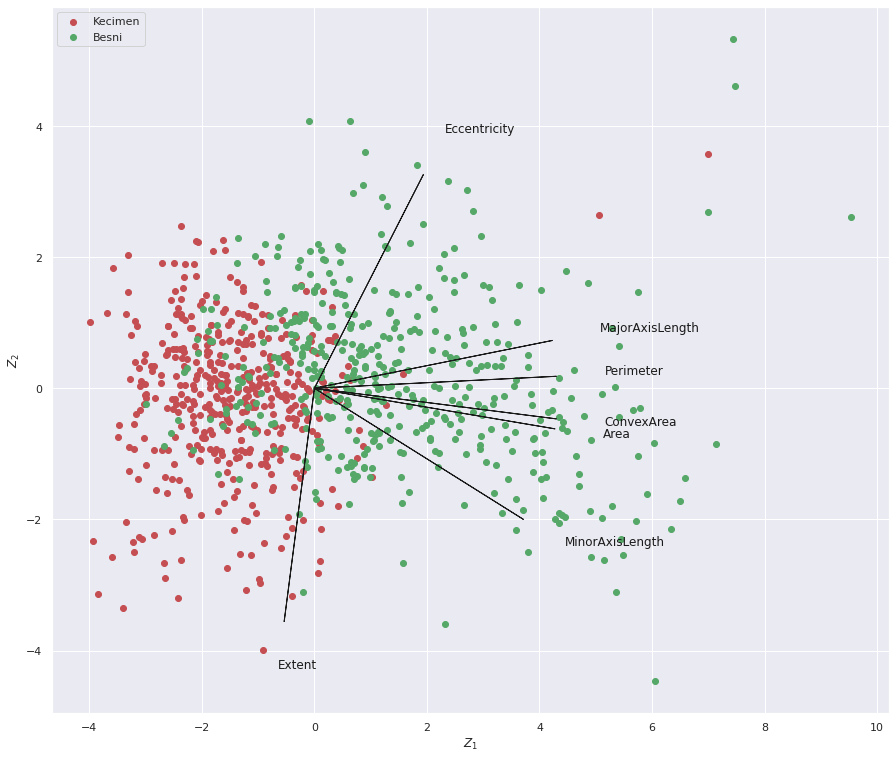

In [26]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='r', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='g', label='Besni')

plt.legend(loc='upper left')

### Using PCA Library

In [27]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=68b7ba873ccd5d71503fec1cf87da44eb8f28d8a883530c279e57ce18e95a2c8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [28]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


### Principal Components

In [29]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

### Scatter plot 

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f60038e04d0>)

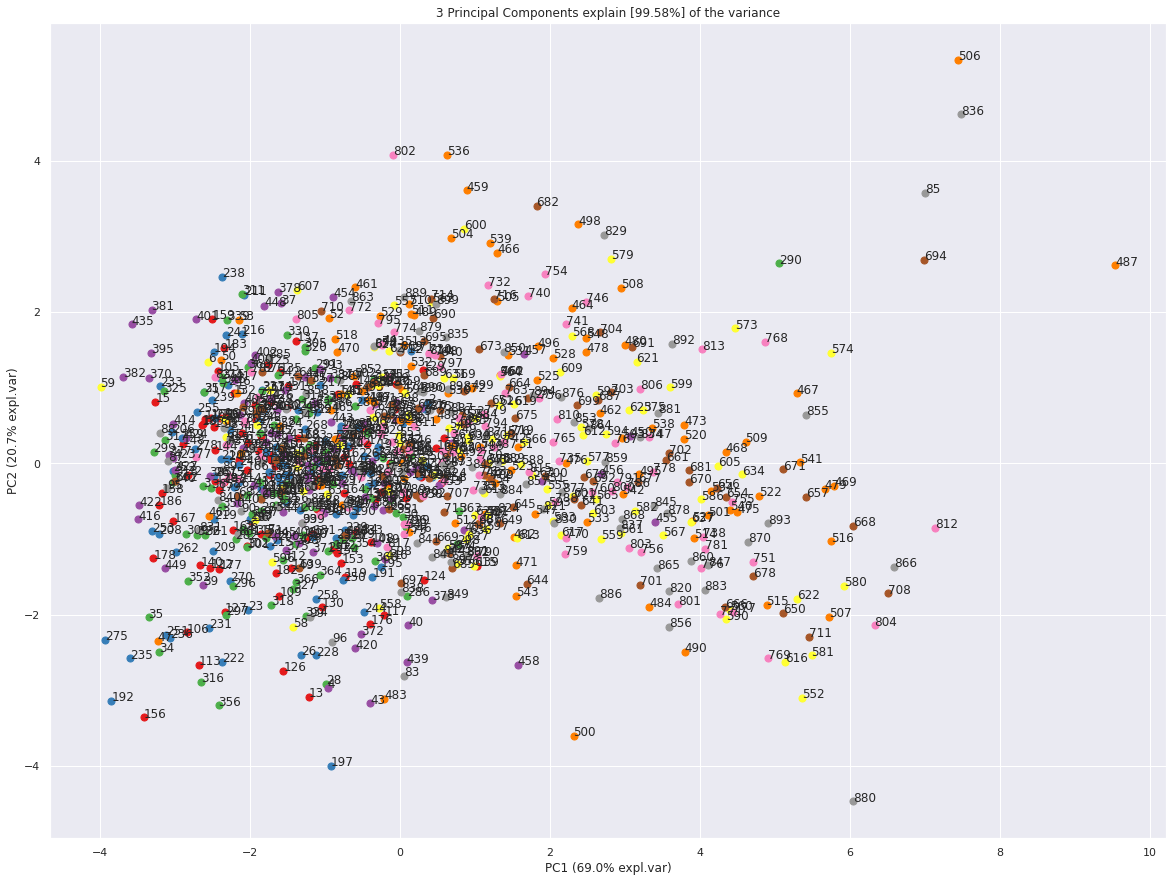

In [30]:
model.scatter(label=True, legend=False,)

### Eigenvectors

In [31]:
A = out['loadings'].T

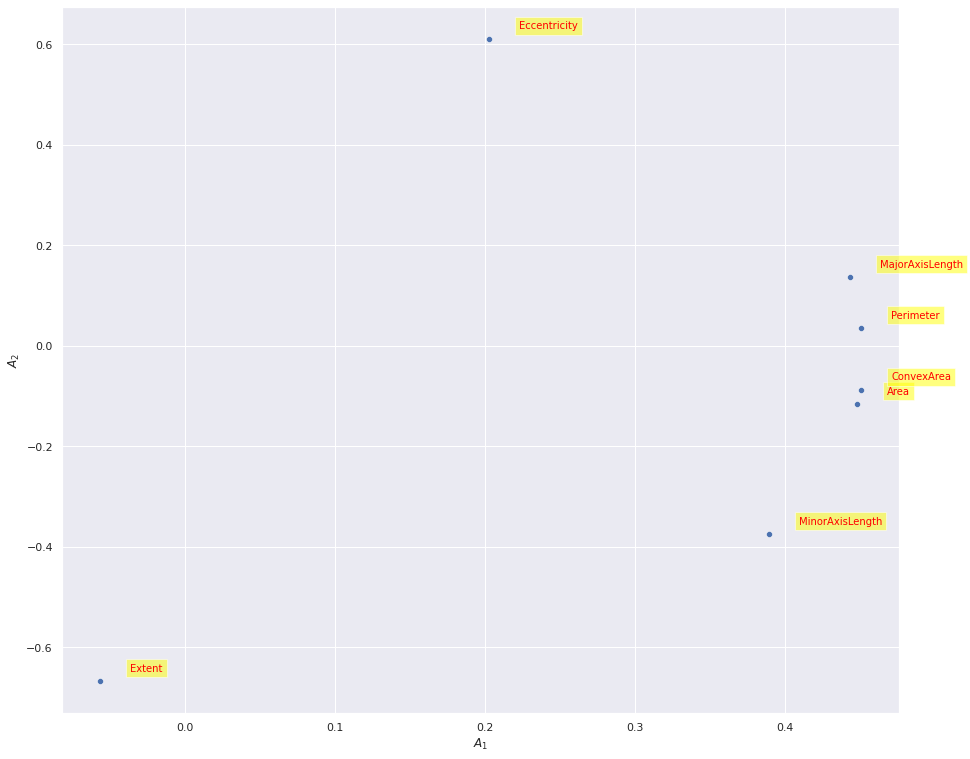

In [32]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

### Scree Plot

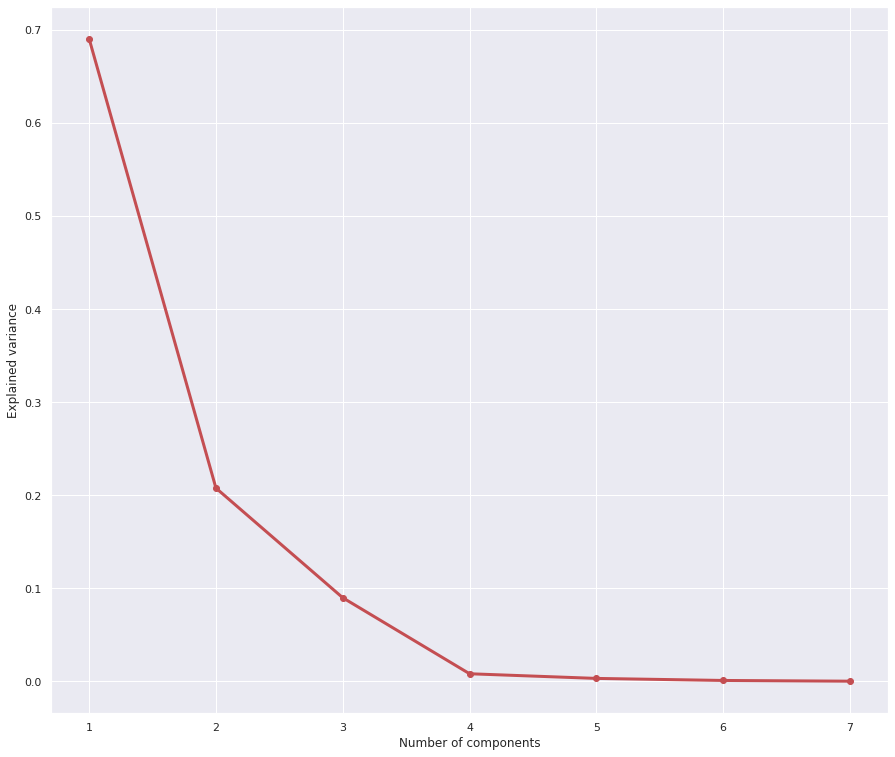

In [33]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

### Explained Variance Plot

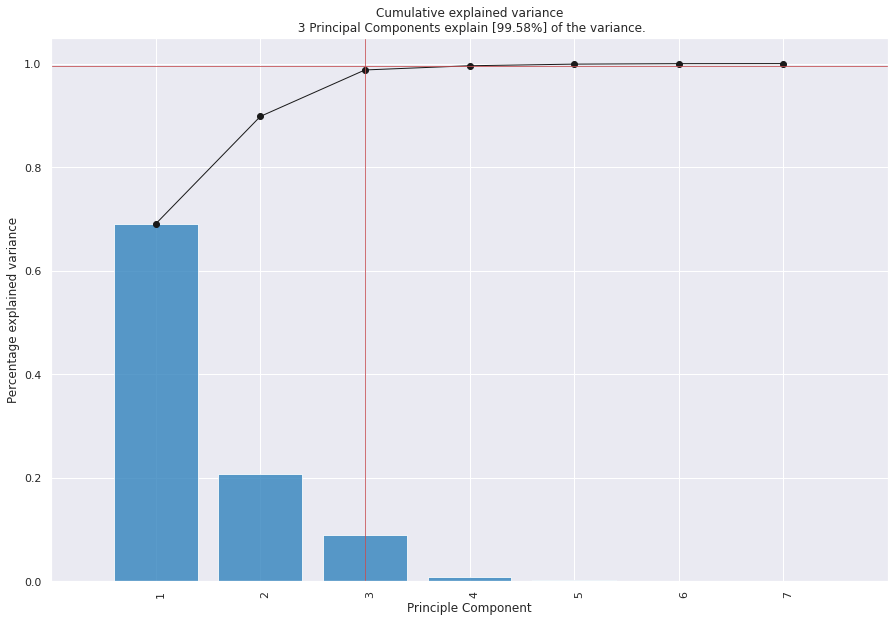

<Figure size 1080x936 with 0 Axes>

In [34]:
model.plot();

### Biplot

[pca] >Plot PC1 vs PC2 with loadings.


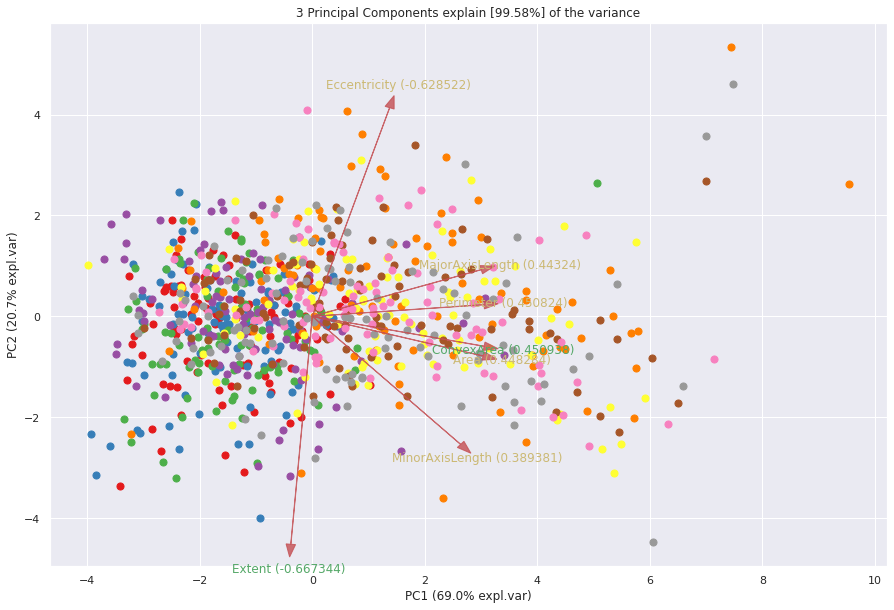

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6008260c50>)

In [35]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


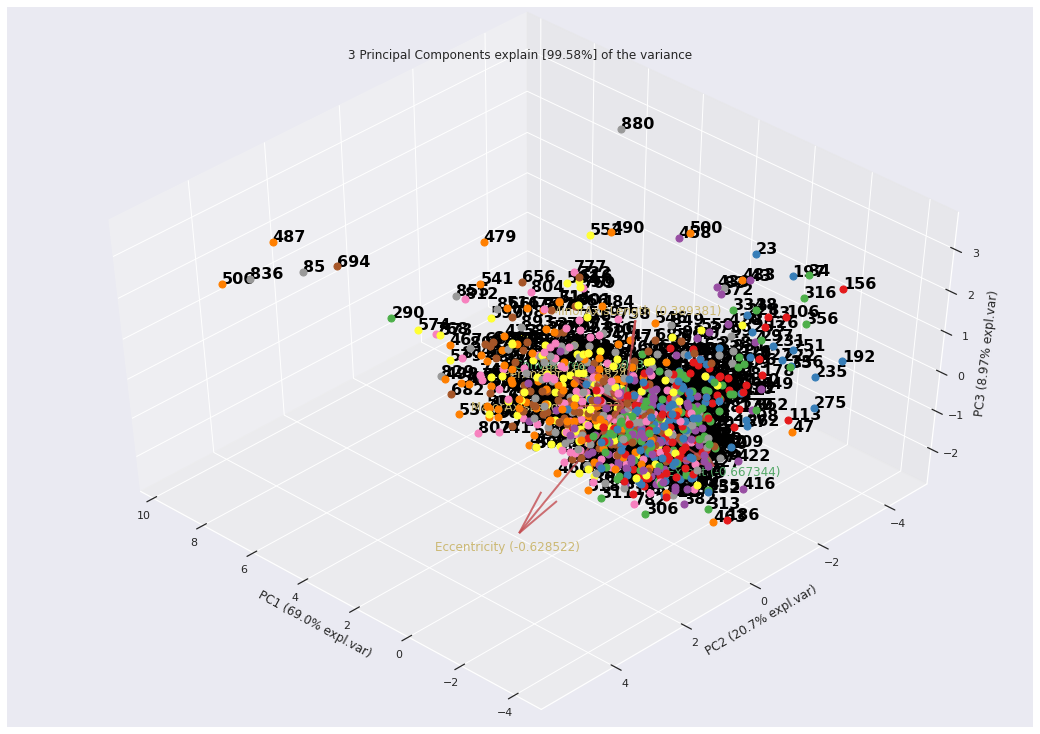

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f600ad4cf90>)

In [36]:
model.biplot3d(legend=False)

### Classification

In [37]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [38]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


In [39]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=76)

Description             Value
0                               session_id                76
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 6)
12                    Transformed Test Set          (244, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              e6ad
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

### Comparing All Models

In [40]:
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.8853  0.9322  0.8452  0.9221   
ridge                    Ridge Classifier    0.8801  0.0000  0.8488  0.9096   
lr                    Logistic Regression    0.8783  0.9320  0.8488  0.9053   
lda          Linear Discriminant Analysis    0.8766  0.9271  0.8523  0.8986   
et                 Extra Trees Classifier    0.8765  0.9223  0.8383  0.9117   
qda       Quadratic Discriminant Analysis    0.8764  0.9286  0.8060  0.9416   
lightgbm  Light Gradient Boosting Machine    0.8746  0.9264  0.8525  0.8968   
gbc          Gradient Boosting Classifier    0.8729  0.9248  0.8420  0.9016   
ada                  Ada Boost Classifier    0.8677  0.9117  0.8383  0.8949   
nb                            Naive Bayes    0.8501  0.9133  0.7712  0.9213   
dt               Decision Tree Classifier    0.8268  0.8266  0.8344  0.8307   
knn                K Neighbors Classifier    0.8147  0.8700  0.7642  0.8547   
svm                   SVM - Linear Kernel    0.5535  0.0000  0.8000  0.5526   
dummy                    Dummy Classifier    0.5018  0.5000  1.0000  0.5018   

              F1   Kappa     MCC  TT (Sec)  
rf        0.8813  0.7705  0.7742     0.596  
ridge     0.8766  0.7602  0.7640     0.021  
lr        0.8748  0.7566  0.7599     0.515  
lda       0.8738  0.7531  0.7557     0.022  
et        0.8728  0.7529  0.7564     0.512  
qda       0.8674  0.7527  0.7621     0.019  
lightgbm  0.8727  0.7493  0.7524     0.089  
gbc       0.8699  0.7458  0.7489     0.207  
ada       0.8647  0.7354  0.7384     0.166  
nb        0.8373  0.7002  0.7122     0.023  
dt        0.8304  0.6534  0.6568     0.025  
knn       0.8049  0.6292  0.6350     0.140  
svm       0.6022  0.1000  0.1155     0.020  
dummy     0.6682  0.0000  0.0000     0.013

In [41]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=76, verbose=0,
                       warm_start=False)

### Create Decision Tree Classifier

In [42]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7544  0.7531  0.8276  0.7273  0.7742  0.5074  0.5125
1       0.8246  0.8251  0.7931  0.8519  0.8214  0.6494  0.6510
2       0.8070  0.8054  0.8966  0.7647  0.8254  0.6127  0.6224
3       0.8772  0.8775  0.8621  0.8929  0.8772  0.7545  0.7549
4       0.8772  0.8775  0.8929  0.8621  0.8772  0.7545  0.7549
5       0.8246  0.8239  0.7857  0.8462  0.8148  0.6486  0.6502
6       0.8929  0.8929  0.8214  0.9583  0.8846  0.7857  0.7939
7       0.8929  0.8929  0.8571  0.9231  0.8889  0.7857  0.7877
8       0.8036  0.8036  0.8214  0.7931  0.8070  0.6071  0.6075
9       0.7143  0.7143  0.7857  0.6875  0.7333  0.4286  0.4330
Mean    0.8268  0.8266  0.8344  0.8307  0.8304  0.6534  0.6568
SD      0.0571  0.0574  0.0392  0.0821  0.0492  0.1145  0.1139

In [43]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=76, splitter='best')

### Tune Decision Tree Model

In [44]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7719  0.7648  0.7586  0.7857  0.7719  0.5440  0.5443
1       0.8772  0.9273  0.9310  0.8438  0.8852  0.7539  0.7581
2       0.8596  0.8732  0.8621  0.8621  0.8621  0.7192  0.7192
3       0.8947  0.9200  0.8621  0.9259  0.8929  0.7897  0.7916
4       0.8421  0.9039  0.8571  0.8276  0.8421  0.6843  0.6847
5       0.8596  0.8990  0.8571  0.8571  0.8571  0.7192  0.7192
6       0.9286  0.9554  0.9286  0.9286  0.9286  0.8571  0.8571
7       0.9107  0.9362  0.8929  0.9259  0.9091  0.8214  0.8220
8       0.8393  0.8756  0.8214  0.8519  0.8364  0.6786  0.6790
9       0.8750  0.8992  0.8214  0.9200  0.8679  0.7500  0.7543
Mean    0.8659  0.8955  0.8592  0.8729  0.8653  0.7317  0.7330
SD      0.0414  0.0499  0.0491  0.0472  0.0415  0.0828  0.0831

In [45]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=76, splitter='best')

### Evaluate Decision Tree Model

In [46]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [47]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Create K Neighbors Model

In [48]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7193  0.7438  0.7241  0.7241  0.7241  0.4384  0.4384
1       0.8947  0.9692  0.8621  0.9259  0.8929  0.7897  0.7916
2       0.7368  0.7605  0.6897  0.7692  0.7273  0.4745  0.4771
3       0.8070  0.9070  0.7586  0.8462  0.8000  0.6146  0.6181
4       0.8246  0.8688  0.7857  0.8462  0.8148  0.6486  0.6502
5       0.8070  0.8812  0.6786  0.9048  0.7755  0.6122  0.6318
6       0.8929  0.9139  0.8929  0.8929  0.8929  0.7857  0.7857
7       0.8393  0.9107  0.8214  0.8519  0.8364  0.6786  0.6790
8       0.7857  0.8635  0.7143  0.8333  0.7692  0.5714  0.5774
9       0.8393  0.8814  0.7143  0.9524  0.8163  0.6786  0.7008
Mean    0.8147  0.8700  0.7642  0.8547  0.8049  0.6292  0.6350
SD      0.0547  0.0656  0.0703  0.0660  0.0560  0.1094  0.1100

### Tune K Neighbors Model

In [49]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7368  0.8036  0.6897  0.7692  0.7273  0.4745  0.4771
1       0.8947  0.9550  0.7931  1.0000  0.8846  0.7902  0.8082
2       0.7895  0.8448  0.6552  0.9048  0.7600  0.5809  0.6050
3       0.8596  0.9495  0.7586  0.9565  0.8462  0.7202  0.7366
4       0.8421  0.9255  0.7500  0.9130  0.8235  0.6831  0.6940
5       0.8772  0.9033  0.7500  1.0000  0.8571  0.7532  0.7773
6       0.8750  0.9560  0.8571  0.8889  0.8727  0.7500  0.7505
7       0.8571  0.9394  0.8214  0.8846  0.8519  0.7143  0.7161
8       0.8571  0.9158  0.7857  0.9167  0.8462  0.7143  0.7217
9       0.8036  0.8795  0.6786  0.9048  0.7755  0.6071  0.6271
Mean    0.8393  0.9072  0.7539  0.9138  0.8245  0.6788  0.6914
SD      0.0459  0.0483  0.0611  0.0626  0.0497  0.0915  0.0925

### Evaluate K Neighbors Model

In [50]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Create Logistic Regression Model

In [51]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8485  0.7586  0.8462  0.8000  0.6146  0.6181
1       0.8246  0.9163  0.8276  0.8276  0.8276  0.6490  0.6490
2       0.8596  0.9002  0.8621  0.8621  0.8621  0.7192  0.7192
3       0.9123  0.9483  0.8966  0.9286  0.9123  0.8246  0.8251
4       0.8772  0.9655  0.8571  0.8889  0.8727  0.7542  0.7546
5       0.8772  0.9532  0.8571  0.8889  0.8727  0.7542  0.7546
6       0.9464  0.9770  0.9643  0.9310  0.9474  0.8929  0.8934
7       0.8929  0.9707  0.8571  0.9231  0.8889  0.7857  0.7877
8       0.8750  0.8992  0.7857  0.9565  0.8627  0.7500  0.7623
9       0.9107  0.9413  0.8214  1.0000  0.9020  0.8214  0.8348
Mean    0.8783  0.9320  0.8488  0.9053  0.8748  0.7566  0.7599
SD      0.0392  0.0384  0.0541  0.0501  0.0397  0.0784  0.0791

### Tune Logistic Regression Model

In [52]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8485  0.7586  0.8462  0.8000  0.6146  0.6181
1       0.8246  0.9163  0.8276  0.8276  0.8276  0.6490  0.6490
2       0.8596  0.9002  0.8621  0.8621  0.8621  0.7192  0.7192
3       0.9123  0.9483  0.8966  0.9286  0.9123  0.8246  0.8251
4       0.8772  0.9655  0.8571  0.8889  0.8727  0.7542  0.7546
5       0.8772  0.9532  0.8571  0.8889  0.8727  0.7542  0.7546
6       0.9464  0.9770  0.9643  0.9310  0.9474  0.8929  0.8934
7       0.8929  0.9707  0.8571  0.9231  0.8889  0.7857  0.7877
8       0.8750  0.8992  0.7857  0.9565  0.8627  0.7500  0.7623
9       0.9107  0.9413  0.8214  1.0000  0.9020  0.8214  0.8348
Mean    0.8783  0.9320  0.8488  0.9053  0.8748  0.7566  0.7599
SD      0.0392  0.0384  0.0541  0.0501  0.0397  0.0784  0.0791

### Evaluate Logistic Regression Model

In [53]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Create Random Forest Model

In [54]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7719  0.8399  0.7586  0.7857  0.7719  0.5440  0.5443
1       0.8947  0.9427  0.8621  0.9259  0.8929  0.7897  0.7916
2       0.8772  0.9021  0.8621  0.8929  0.8772  0.7545  0.7549
3       0.9123  0.9550  0.8621  0.9615  0.9091  0.8248  0.8294
4       0.8772  0.9378  0.8571  0.8889  0.8727  0.7542  0.7546
5       0.9123  0.9569  0.8214  1.0000  0.9020  0.8240  0.8370
6       0.9464  0.9764  0.9286  0.9630  0.9455  0.8929  0.8934
7       0.8929  0.9592  0.8571  0.9231  0.8889  0.7857  0.7877
8       0.8393  0.9075  0.7857  0.8800  0.8302  0.6786  0.6825
9       0.9286  0.9445  0.8571  1.0000  0.9231  0.8571  0.8660
Mean    0.8853  0.9322  0.8452  0.9221  0.8813  0.7705  0.7742
SD      0.0472  0.0376  0.0445  0.0614  0.0468  0.0944  0.0960

### Tune Random Forest Model

In [55]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7719  0.8202  0.7931  0.7667  0.7797  0.5434  0.5438
1       0.8596  0.9489  0.7931  0.9200  0.8519  0.7199  0.7271
2       0.8772  0.8916  0.8621  0.8929  0.8772  0.7545  0.7549
3       0.8947  0.9212  0.8621  0.9259  0.8929  0.7897  0.7916
4       0.8947  0.9421  0.8571  0.9231  0.8889  0.7891  0.7911
5       0.9123  0.9446  0.8571  0.9600  0.9057  0.8242  0.8288
6       0.9286  0.9732  0.8929  0.9615  0.9259  0.8571  0.8593
7       0.8929  0.9439  0.8571  0.9231  0.8889  0.7857  0.7877
8       0.8750  0.8999  0.8214  0.9200  0.8679  0.7500  0.7543
9       0.9286  0.9228  0.8571  1.0000  0.9231  0.8571  0.8660
Mean    0.8836  0.9208  0.8453  0.9193  0.8802  0.7671  0.7705
SD      0.0428  0.0406  0.0307  0.0583  0.0400  0.0857  0.0868

### Evaluate Random Forest Model

In [56]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Tune the Best Model

In [57]:
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7719  0.8202  0.7931  0.7667  0.7797  0.5434  0.5438
1       0.8596  0.9489  0.7931  0.9200  0.8519  0.7199  0.7271
2       0.8772  0.8916  0.8621  0.8929  0.8772  0.7545  0.7549
3       0.8947  0.9212  0.8621  0.9259  0.8929  0.7897  0.7916
4       0.8947  0.9421  0.8571  0.9231  0.8889  0.7891  0.7911
5       0.9123  0.9446  0.8571  0.9600  0.9057  0.8242  0.8288
6       0.9286  0.9732  0.8929  0.9615  0.9259  0.8571  0.8593
7       0.8929  0.9439  0.8571  0.9231  0.8889  0.7857  0.7877
8       0.8750  0.8999  0.8214  0.9200  0.8679  0.7500  0.7543
9       0.9286  0.9228  0.8571  1.0000  0.9231  0.8571  0.8660
Mean    0.8836  0.9208  0.8453  0.9193  0.8802  0.7671  0.7705
SD      0.0428  0.0406  0.0307  0.0583  0.0400  0.0857  0.0868

In [58]:
tuned_best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=76, verbose=0, warm_start=False)

### Evaluate the Best Model

In [59]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Classification + PCA

In [60]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 3)
12                    Transformed Test Set          (244, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              72a0
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [61]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8604  0.9060  0.8108  0.9032   
lr                    Logistic Regression    0.8570  0.9206  0.8424  0.8748   
ridge                    Ridge Classifier    0.8569  0.0000  0.7969  0.9102   
lda          Linear Discriminant Analysis    0.8569  0.9213  0.7969  0.9102   
lightgbm  Light Gradient Boosting Machine    0.8553  0.9056  0.8283  0.8792   
nb                            Naive Bayes    0.8552  0.9199  0.7933  0.9089   
ada                  Ada Boost Classifier    0.8517  0.9077  0.8145  0.8839   
qda       Quadratic Discriminant Analysis    0.8463  0.9112  0.7865  0.8994   
rf               Random Forest Classifier    0.8429  0.9069  0.8004  0.8800   
gbc          Gradient Boosting Classifier    0.8412  0.9094  0.8144  0.8657   
et                 Extra Trees Classifier    0.8357  0.9171  0.8001  0.8651   
svm                   SVM - Linear Kernel    0.8184  0.0000  0.8387  0.8202   
dt               Decision Tree Classifier    0.8007  0.8004  0.8107  0.8023   
dummy                    Dummy Classifier    0.5035  0.5000  1.0000  0.5035   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8541  0.7211  0.7255     0.114  
lr        0.8561  0.7139  0.7179     0.017  
ridge     0.8486  0.7142  0.7212     0.014  
lda       0.8486  0.7142  0.7212     0.014  
lightgbm  0.8517  0.7107  0.7137     0.048  
nb        0.8467  0.7107  0.7171     0.013  
ada       0.8465  0.7036  0.7076     0.102  
qda       0.8370  0.6930  0.7011     0.014  
rf        0.8366  0.6859  0.6909     0.493  
gbc       0.8376  0.6824  0.6858     0.103  
et        0.8290  0.6716  0.6763     0.459  
svm       0.8257  0.6367  0.6430     0.017  
dt        0.8039  0.6010  0.6052     0.017  
dummy     0.6698  0.0000  0.0000     0.011

In [62]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### Tune the Best Model

In [63]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9002  0.7586  0.9167  0.8302  0.6851  0.6958
1       0.8772  0.8904  0.8621  0.8929  0.8772  0.7545  0.7549
2       0.8772  0.9655  0.8621  0.8929  0.8772  0.7545  0.7549
3       0.8070  0.9317  0.6897  0.9091  0.7843  0.6156  0.6349
4       0.8596  0.8849  0.8276  0.8889  0.8571  0.7196  0.7213
5       0.9298  0.9446  0.8571  1.0000  0.9231  0.8593  0.8679
6       0.8393  0.9082  0.7857  0.8800  0.8302  0.6786  0.6825
7       0.8929  0.9267  0.8571  0.9231  0.8889  0.7857  0.7877
8       0.9286  0.9528  0.8929  0.9615  0.9259  0.8571  0.8593
9       0.8571  0.9184  0.8214  0.8846  0.8519  0.7143  0.7161
Mean    0.8711  0.9223  0.8214  0.9150  0.8646  0.7424  0.7475
SD      0.0369  0.0255  0.0579  0.0365  0.0414  0.0733  0.0707

In [64]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

### Evaluate the Best Model

In [65]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Explainable AI with Shapley values

In [66]:
!pip install shap

     |████████████████████████████████| 564 kB 4.2 MB/s 


In [67]:
import shap

In [68]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8898  0.7241  0.8400  0.7778  0.5799  0.5856
1       0.8596  0.8849  0.8276  0.8889  0.8571  0.7196  0.7213
2       0.8246  0.9261  0.8621  0.8065  0.8333  0.6486  0.6502
3       0.8070  0.9113  0.6897  0.9091  0.7843  0.6156  0.6349
4       0.8246  0.8725  0.7931  0.8519  0.8214  0.6494  0.6510
5       0.8772  0.8984  0.7857  0.9565  0.8627  0.7536  0.7655
6       0.8393  0.9165  0.7857  0.8800  0.8302  0.6786  0.6825
7       0.8571  0.9094  0.8214  0.8846  0.8519  0.7143  0.7161
8       0.9286  0.9662  0.8929  0.9615  0.9259  0.8571  0.8593
9       0.8214  0.8941  0.8214  0.8214  0.8214  0.6429  0.6429
Mean    0.8429  0.9069  0.8004  0.8800  0.8366  0.6859  0.6909
SD      0.0378  0.0249  0.0570  0.0497  0.0400  0.0753  0.0744

In [69]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8892  0.7586  0.8462  0.8000  0.6146  0.6181
1       0.8596  0.8879  0.8276  0.8889  0.8571  0.7196  0.7213
2       0.8421  0.9243  0.8276  0.8571  0.8421  0.6843  0.6847
3       0.8246  0.9064  0.7241  0.9130  0.8077  0.6503  0.6651
4       0.8421  0.8732  0.8276  0.8571  0.8421  0.6843  0.6847
5       0.9123  0.9335  0.8214  1.0000  0.9020  0.8240  0.8370
6       0.8571  0.8929  0.8214  0.8846  0.8519  0.7143  0.7161
7       0.8750  0.9094  0.8214  0.9200  0.8679  0.7500  0.7543
8       0.9286  0.9630  0.8929  0.9615  0.9259  0.8571  0.8593
9       0.8571  0.9267  0.8929  0.8333  0.8621  0.7143  0.7161
Mean    0.8606  0.9106  0.8216  0.8962  0.8559  0.7213  0.7257
SD      0.0352  0.0253  0.0487  0.0506  0.0361  0.0701  0.0706

### SHAP Summary Plot

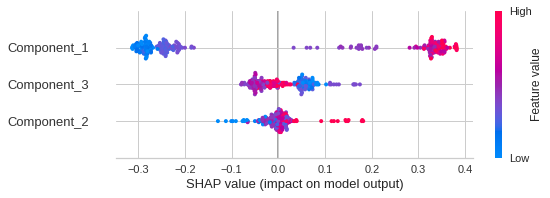

In [70]:
interpret_model(tuned_rf_pca, plot='summary')

### Visualize a single prediction

In [71]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

### Visualize many predictions

In [72]:
interpret_model(tuned_rf_pca, plot='reason')